# Supervised and Unsupervised Learning
### Basic Concepts

This notebook just shows some example of data here generated in order to get some insights on the ideas of supervised and unsupervised learning.

There are a lot of resources in this respect and this notebook does not pretend to be a complete and detailed description, just some vague idea of which kind of problems may be addressed with which strategy.

## Some remarks

Visualization is always important when working with data, nevertheless it is not always possible as there are high dimensional dataset that makes this task a complete challenge, so to illustrate here, we are going to use 2D and 3D data.

The most difficult part during the process of working with data & ML, is getting clean the dataset, so we will face those problems later on. 

In this point we are going to suppose we have the data already organized at each example.

---

Some people describe Machine learning in comparison with _normal_ programming, as follows

> When programming, normally you have some inputs and some rules, and the code computes an outputs, but on machine learning, you give the inputs and outputs and the computer gives you the _rule_

I particularly think that there is something missing in that description and is that you must know something about the phenomena, so that a **model** is also given, and the output is basically the best way our model describes the data we gave, namely the input and output. So the _rule_ we get is based on our model.

So the question is always how to choose our model.

 Let us first import the libraries used here on which are just `numpy` for having arrays, `curve_fit` to do a regression and finally `matplotlib` to plot everything.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

### Supervised

The idea on the supervised learning is that we have a set of features which combined lead to a given output.

So let us consider the following, we have a set of features $\mathbf{x}$ and we know the output of them, let us call it  $\mathbf{y}$ (This $\mathbf{y}$ can be numerical values or just a discrete values denoting a set)

So we have that
$$
\mathbf{x}\longrightarrow \mathbf{y}
$$
and let us consider another set of data $\mathbf{x}_2$ for which we do not know the output $\mathbf{y}_2$

> _How can we find the output for $\mathbf{x}$_ 
> $$ \mathbf{x}_2\longrightarrow \mathbf{?} $$
> 

The main idea is that the output of $\mathbf{x}_2$ is _found_ based on the relationship between $\mathbf{x}$ and $\mathbf{y}$, so this relationship is what the machine _learns_. So let us illustrate this with a simple example

---

The principal ingredient is the **data**. This data comes from a _experiment_ or a _measurement_ and we may use a model to describe the phenomena this data comes from.

> **Note** The model must describe the phenomena based on the data, but it can happen that the model reproduces very well the data but not the phenomena, this is called _overfitting_ but we will come into that latter. We just mention this here as is good for us to keep key words into our minds.

Until this point, we do not have any source of data, so let us create some where it is clear that the phenomena follows a linear relationship.

#### Regression

The regression is basically using the set of inputs to get a continuous variable as an output, such as electric current or velocity.

In [2]:
x=10*np.random.random(500)
y=x+np.random.normal(0,1,500)

In principle, we do not know the relationship of the data, so the first thing we have to do is some exploratory incursion on the data. In this case we can plot it because of the dimensions (1 input 1 output),

Text(0, 0.5, 'Outputs $y$')

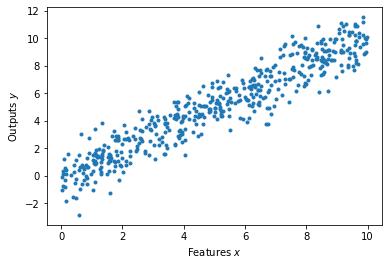

In [3]:
plt.plot(x,y,'.')
plt.xlabel("Features $x$")
plt.ylabel("Outputs $y$")

Now we may try one model which looks like a linear relationship. We created like that, but in the real world we may have some reasons to impose a model, they can be theoretical or just by inspection. This part is what really is challenging, as we can use wrong models for the phenomena that may work relatively good for the training data.

In [4]:
def f(x,a,b):
    return a*x+b

We use our data to train the model, in this case that means that we find the optimal values of $a$ and $b$ for the straight line

$$
f(x)=ax+b
$$

This is done minimizing the squares distances, as it is implemented on `scipy`.

In [5]:
popt,pcov=curve_fit(f,x,y)

So, let us plot the data and model,

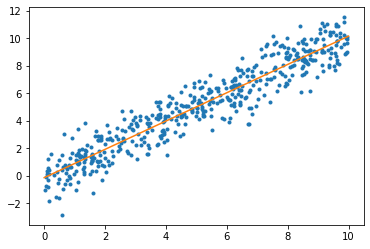

In [6]:
x_plot=np.linspace(0,10,1000)
plt.plot(x,y,'.')
plt.plot(x_plot,f(x_plot,*popt))

So we can use our model trained (with the optimal parameters given the data), to find the values of new features,

In [7]:
f(7,*popt)

7.065341322317252

The optimal values found for our model are

In [8]:
popt

array([ 1.02967861, -0.14240892])

Which are very similar for the real values (1,0).

---
Now we may need to see the error of these parameters, that information is saved on the covariance matrix

In [9]:
print(pcov.diagonal()**.5)

[0.01568525 0.09205574]


#### Classification

Classification tasks are basically those cases where the possible outcome is discrete, so for instance consider the case a person wins a price or doesn't, there is not in between possibility, is in a place or another and so on. So the nature of the data is aimed to have a simple discrete value as output, based on a set of variables that are meant to describe the phenomena.

In [10]:
x=np.random.normal(0,1,500)
y=np.random.normal(0,1,500)

x2=np.random.normal(4,1,500)
y2=np.random.normal(4,1,500)

We just created some data that can be divided intuitively just as follows

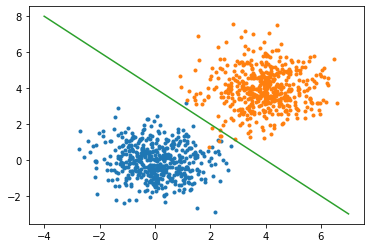

In [11]:
plt.plot(x,y,'.')
plt.plot(x2,y2,'.')
x_plot=np.linspace(-4,7)
plt.plot(x_plot,-x_plot+4)

In that sense, we may be able to predict new data if it is above or bellow our green line, so for instance if we add a new point, here presented to be violet, we can tell that this belongs to the _orange_ class as it is above the line.

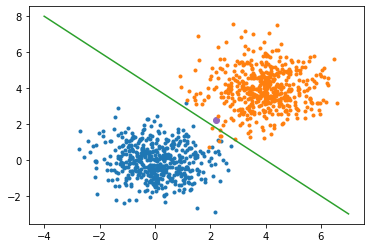

In [12]:
plt.plot(x,y,'.')
plt.plot(x2,y2,'.')
x_plot=np.linspace(-4,7)
plt.plot(x_plot,-x_plot+4)
plt.scatter(2.2,2.2,color='C4')

This is not always done right, as there you can see there are some points in the _wrong_ set, but we can aways have some confidence interval there, and therefore also a confidence of our choice of set.

### Unsupervised

In the case of unsupervised learning, there is not output, for instance clustering, so consider that we just have some data and we want to select which points are grouped, so they will have _close_ values.

The idea of unsupervised learning is getting some structure from the data, the data has some internal properties itself that cannot be distinguished from a target variable, so let see a practical example,

In [13]:
x1=np.random.normal(0,1,500)
y1=np.random.normal(0,1,500)

x2=np.random.normal(4,1,500)
y2=np.random.normal(4,1,500)

x=np.append(x1,x2)
y=np.append(y1,y2)

We created two clusters (grouped data), but we do not have the variables to distinguish them,

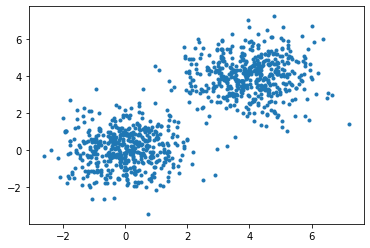

In [14]:
plt.plot(x,y,'.')

One way to separate the data in clusters is getting a centered circle in such a way that the points look well located inside a circle, as follows

In [15]:
def circle(x_c,y_c,r,npu):
    theta=np.linspace(0,2*np.pi,npu)
    x = x_c+r*np.cos(theta)
    y = y_c+r*np.sin(theta)
    return x,y

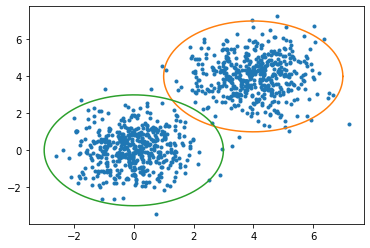

In [16]:
plt.plot(x,y,'.')
x_c1,y_c1=circle(4,4,3,1000)
plt.plot(x_c1,y_c1)
x_c1,y_c1=circle(0,0,3,1000)
plt.plot(x_c1,y_c1)

Of course there are some that look like they can belong to both classes, but this can will depend on the method we choose to use, so we will discuss those cases latter on.